In [1]:
from tensor import Tensor

In [ ]:
a = Tensor(2.0)
b = Tensor(3.0)

f = a+b
c = Tensor(4.0)
f1 = f*c
f2 = f1.tanh()

f1.backward()
print("output: {}".format(f2))

print("a.grad : {}".format(a.grad))
print("b.grad : {}".format(b.grad))
print("c.grad : {}".format(c.grad))
f1,f

In [ ]:
b.requires_grad = True
print(b.grad)

In [ ]:
f2 = a * b *c
f2.backward()
print("a.grad : {}".format(a.grad))
print("b.grad : {}".format(b.grad))
print("c.grad : {}".format(c.grad))

In [7]:
def save(*inputs):
    saved_tensors = inputs
    print(saved_tensors)

In [5]:
import torch

In [6]:
# torch.Tensor only takes sequence value [1,2,3]
x = torch.Tensor([2.0])
x.requires_grad = False
y = torch.Tensor([3.0])
y.requires_grad = True

f = x*y

In [ ]:
f.backward()
x.grad,y.grad

In [ ]:
f

In [ ]:
import sys
print(sys.version)

In [1]:
from nn import MLP

In [2]:
model = MLP(3,(2,3,1))
a = [1,2,3]

In [3]:
model.parameters()

[Tensor(0.29624916167243354, grad_fn=<NoneBackward>),
 Tensor(0.8090677156733267, grad_fn=<NoneBackward>),
 Tensor(0.35025252522341144, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.29624916167243354, grad_fn=<NoneBackward>),
 Tensor(0.8090677156733267, grad_fn=<NoneBackward>),
 Tensor(0.35025252522341144, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.29624916167243354, grad_fn=<NoneBackward>),
 Tensor(0.8090677156733267, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.29624916167243354, grad_fn=<NoneBackward>),
 Tensor(0.8090677156733267, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.29624916167243354, grad_fn=<NoneBackward>),
 Tensor(0.8090677156733267, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.29624916167243354, grad_fn=<NoneBackward>),
 Tensor(0.8090677156733267, grad_fn=<NoneBackward>),
 Tensor(0.35025252522341144, grad_fn=<NoneBackward>),
 Tenso

In [4]:
output = model(a)
output 

Tensor(8.834949550151086, grad_fn=<AddBackward>)

In [5]:
output.backward()

In [6]:
for param in model.parameters():
    print(param.grad)

0.431211215267162
0.862422430534324
1.2936336458014859
0.431211215267162
1.1776542115406285
2.355308423081257
3.5329626346218856
1.1776542115406285
1.1746700433862265
1.1746700433862265
0.29624916167243354
3.20806851674145
3.20806851674145
0.8090677156733267
1.3888010574532688
1.3888010574532688
0.35025252522341144
5.3827385601276765
5.3827385601276765
5.3827385601276765
1.0


In [7]:
for layer in model.layers:
    print(layer)

<class 'nn.LinearLayer'> Activation: <class 'function.Relu'>
<class 'nn.LinearLayer'> Activation: <class 'function.Relu'>
<class 'nn.LinearLayer'> Activation: None


Testing Module class

In [2]:
from nn import Module
from nn import LinearLayer

In [ ]:
class Model(Moudle):

    def __init__(self):
        super().__init__()
        self.l1 = LinearLayer(3,)

Testing Loss and Optimizer
=

In [1]:
from loss import BCELoss, MSELoss,MCELoss
from tensor import Tensor

In [9]:
loss = BCELoss()
loss1 = MSELoss()

output = loss1(Tensor(0.2),Tensor(1.0))
output

Tensor(0.6400000000000001, grad_fn=<MSELossBackward>)

In [10]:
output.backward()

In [11]:
output.ctx.saved_tensors[0].grad

-1.6

In [2]:
softmax_outputs= [Tensor(0.001),Tensor(0.999)]
oh_label = Tensor([1,0])

loss = MCELoss()
loss = loss(softmax_outputs,oh_label)

In [3]:
loss.backward()
softmax_outputs[0].grad,softmax_outputs[1].grad

(-0.999, 0.999)

Testing Softmax, BCE , MCE, MSE

In [1]:
from tensor import Tensor
from function import Softmax

In [2]:
logits = [Tensor(1.0),Tensor(2.0),Tensor(3.0)]
softmax = Softmax.apply(logits[0],logits) # i = 1
softmax_1 = Softmax.apply(logits[1],logits) # i = 2
softmax_2 = Softmax.apply(logits[2],logits) # i = 3
print(softmax,softmax_1,softmax_2)

Tensor(0.09003057317038046, grad_fn=<SoftmaxBackward>) Tensor(0.24472847105479767, grad_fn=<SoftmaxBackward>) Tensor(0.6652409557748219, grad_fn=<SoftmaxBackward>)


In [3]:
softmax.backward()
softmax_1.backward()
softmax_2.backward()

In [4]:
logits[0].grad, logits[1].grad, logits[2].grad

(6.938893903907228e-18, 0.0, -2.7755575615628914e-17)

#### Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tensor import Tensor
from loss import BCELoss


In [2]:
# Dataset
np.random.seed(69)
x1 = np.random.randn(50)
x2 = np.random.randn(50)
w1,w2, bias = 1.5,-2,0.5 # find this parameters, from random; learning
linear_transformation = w1*x1+w2*x2+bias
probabilities = 1/(1+np.exp(-linear_transformation))
y = (probabilities>0.5).astype(int)
#wx+b=0; w1x1+w2x2+b = 0; 

In [3]:
# decision boundry
# linear sepration line ; wx+b = 0
# x1 = -w2x2-b/w1; x2 = -w1x1-b/w2
x_1 = np.linspace(-3,3,10)
x_2 = np.linspace(-3,3,10)
d_x2 = (-(1.5*x_1)-0.5)/-2
d_x1 = (-(-2*x_2)-0.5)/1.5

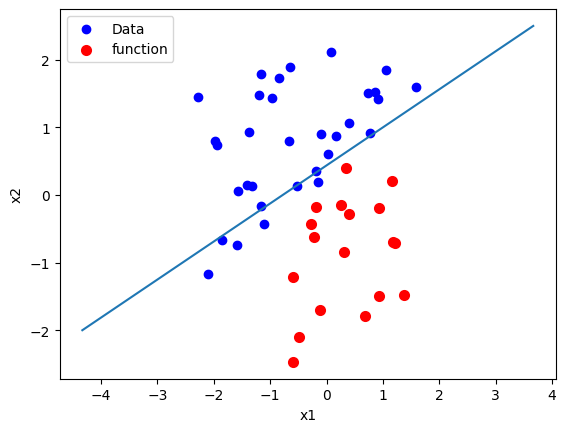

In [4]:
plt.scatter(x1[y==0],x2[y==0],label="Data", color="blue")
plt.scatter(x1[y==1],x2[y==1],color="red",label="function",linewidth=2)
plt.plot(d_x1,d_x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [9]:
# now lets learn that boundry and parameter from linear regression; binary classification
X = [[x1,x2] for x1,x2 in zip(x1,x2)]
y = y

In [486]:
# Model
from nn import Neuron
from function import Sigmoid
model = Neuron(num_features=2,act=Sigmoid)
loss_fn = BCELoss()

In [462]:
# single epoch
for i in range(1000):
    for x,label in zip(X,y):
        probabilities = model(x)
        loss = loss_fn(output=probabilities,target=label)
        loss.backward()

        for param in model.parameters():
            param.data -= 0.001 * param.grad

        for param in model.parameters():
            param.set_grad()

        print(f"Loss : {loss.data}")

Loss : -0.02027819666567922
Loss : 2.653444900999657e-06
Loss : 0.008037663262891188
Loss : 0.005796934673135838
Loss : -0.07581979492394968
Loss : -0.0157921446088804
Loss : 2.3585057551938593e-05
Loss : -0.0027832401736443443
Loss : -0.008032553549922565
Loss : 3.57663534579758e-07
Loss : 0.03612413749461637
Loss : -0.06007789259074454
Loss : -7.370445421218451e-07
Loss : 2.881603348449292e-05
Loss : -0.0013088271358526443
Loss : 3.037504289833852e-05
Loss : 1.4979091578431446e-05
Loss : -1.673281015244616e-06
Loss : -0.015304939694512684
Loss : 0.0650752835103457
Loss : 0.002039880242188271
Loss : -0.016508507893032674
Loss : -0.005128461778042303
Loss : -0.1058454687096024
Loss : -9.982960811631607e-07
Loss : -6.428335738211788e-07
Loss : -0.016801910241843
Loss : -0.0990999968498171
Loss : -0.043254677691242895
Loss : 0.0008242671268593316
Loss : -2.459458032339349e-06
Loss : -0.16329539726235123
Loss : 0.8459714260873978
Loss : -6.202135404560552e-07
Loss : -1.104093132364539e-07

In [487]:
w1,w2,bias = model.parameters()
print(w1.data,w2.data,bias.data)

0.6841723121906749 0.08079130110978516 1.0


In [488]:
# decision boundry for learning
# linear sepration line ; wx+b = 0
# x1 = -w2x2-b/w1; x2 = -w1x1-b/w2
x_1 = np.linspace(-3,3,10)
x_2 = np.linspace(-3,3,10)
d_x2 = (-(w1.data*x_1)-bias.data)/w2.data
d_x1 = (-(w2.data*x_2)-bias.data)/w1.data

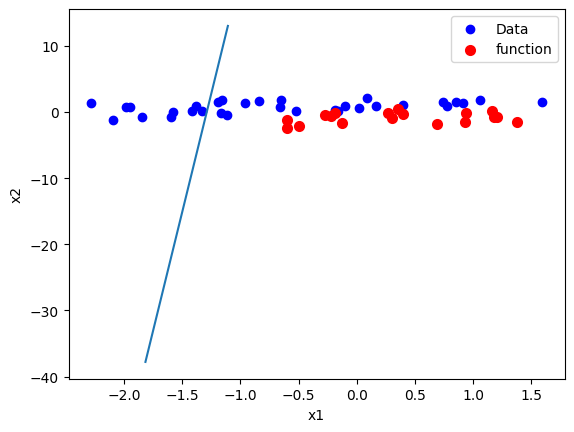

In [489]:
plt.scatter(x1[y==0],x2[y==0],label="Data", color="blue")
plt.scatter(x1[y==1],x2[y==1],color="red",label="function",linewidth=2)
plt.plot(d_x1,d_x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

In [ ]:
# after training to convergence

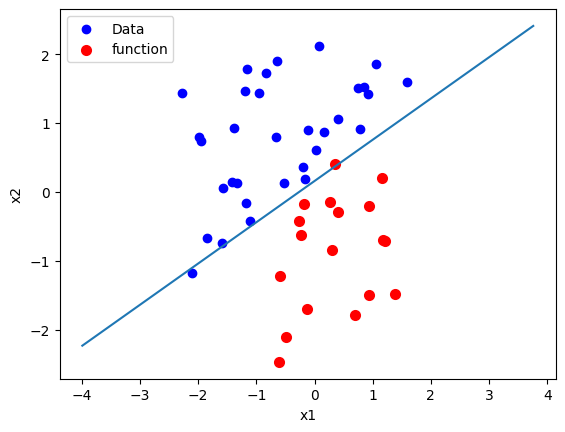

Weigts Visualization over training

Testing Regularization Implementation

In [2]:
from regularization import L1Reg,L2Reg
from tensor import Tensor

In [13]:
w1,w2 = Tensor(1),Tensor(2)
alpha = 0.01

In [14]:
l1 = L1Reg()
l2 = L2Reg()

In [15]:
reg_l1 = l1([w1,w2],alpha)
reg_l2 = l2([w1,w2],alpha)

In [16]:
reg_l1,reg_l2

(Tensor(0.03, grad_fn=<L1RegBackward>), Tensor(0.025, grad_fn=<L2RegBackward>))

In [11]:
reg_l1.backward()
w1.grad,w2.grad

(0.01, 0.01)

In [17]:
reg_l2.backward()
w1.grad,w2.grad

(0.01, 0.02)

Training the classifier 
Dataset: mnist, fashion_mnist, iris_flower_dataset, house_price
house: https://www.kaggle.com/datasets/lespin/house-prices-dataset


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from tensor import Tensor
from loss import MCELoss
from function import Softmax, Relu,Tanh
import nn

In [30]:
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
dataset_y = dataset.pop("species") # remove species from dataset and return

In [32]:
X = dataset.to_numpy()
y = dataset_y.to_numpy()

In [33]:
# Get unique categories and their indices
unique_classes, indices = np.unique(y,return_inverse=True)

In [34]:
# one hot encoding
one_hot_label = np.eye(len(unique_classes))[indices]

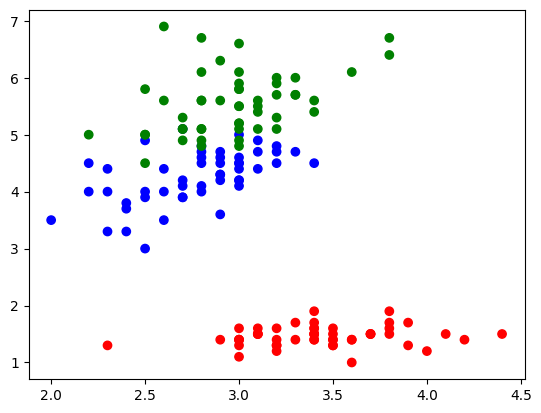

In [83]:
colors = ['red','blue','green']
scatter_colors = [colors[label] for label in indices]

plt.scatter(X[:,1],X[:,2],c=scatter_colors)

In [52]:
# batch
np.random.seed(42)
m,n = X.shape
batch_size = 32
indices = np.random.permutation(m)

In [53]:
X_shuffled, y_shuffled = X[indices],one_hot_label[indices]

In [ ]:
def batch_gradient(X_batch, y_batch):
    for x,y in zip(X_batch,y_batch):
        logits = model.forward(x)
        probs = softmax(logits)
        loss = criterion(probs,y)
        loss.backward()
    
    for param in model.parameters():
        param.grad/len(y_batch)

In [ ]:
# each batch.
for i in range(0,m,batch_size):
    X_batch = X_shuffled[i:i+batch_size]
    y_batch = y_shuffled[i:i+batch_size]
    batch_gradient(X_batch,y_batch)
    optim.step()
    optim.zero_grad()

32
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [37]:
np.random.seed(42)
model = nn.LinearLayer(in_features=4,out_features=3,act=None)

In [38]:
model.parameters()

[Tensor(0.3745401188473625, grad_fn=<NoneBackward>),
 Tensor(0.9507143064099162, grad_fn=<NoneBackward>),
 Tensor(0.7319939418114051, grad_fn=<NoneBackward>),
 Tensor(0.5986584841970366, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.15601864044243652, grad_fn=<NoneBackward>),
 Tensor(0.15599452033620265, grad_fn=<NoneBackward>),
 Tensor(0.05808361216819946, grad_fn=<NoneBackward>),
 Tensor(0.8661761457749352, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(0.6011150117432088, grad_fn=<NoneBackward>),
 Tensor(0.7080725777960455, grad_fn=<NoneBackward>),
 Tensor(0.020584494295802447, grad_fn=<NoneBackward>),
 Tensor(0.9699098521619943, grad_fn=<NoneBackward>),
 Tensor(1.0, grad_fn=<NoneBackward>)]

Momentum and SGD , implementation and Testing
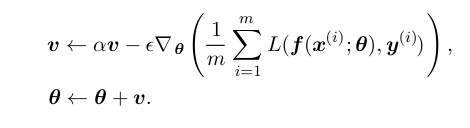
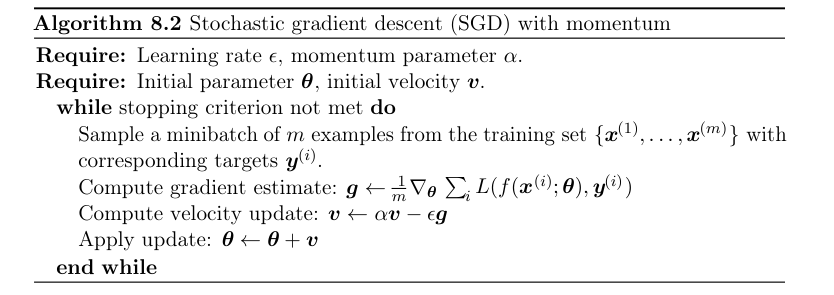

In [24]:
import numpy as np

velocity = [0]
w1 = Tensor(2)
parameter = [w1]
lr = 0.01
alpha =0.9
fx = w1*2



In [25]:
a = np.zeros(4)

In [26]:
[0 for i in range(4)]

[0, 0, 0, 0]

In [27]:
fx.backward()

In [28]:
for i,param in enumerate(parameter):
    velocity[i] = alpha*velocity[i] - lr*param.grad
    param.data +=velocity[i]

In [29]:
velocity

[-0.02]

In [ ]:
# Adam

Training A Classifier

In [1]:
import seaborn as sns 
import numpy as np
from tensor import Tensor
from loss import MCELoss
from function import Softmax,Relu
import nn
from optimizer import SGD

In [2]:
# dataset 
dataset = sns.load_dataset('iris')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
y = dataset.pop('species').to_numpy()
X = dataset.to_numpy()

In [4]:
unique_classes, indices = np.unique(y,return_inverse=True)
unique_classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
one_hot_label = np.eye(len(unique_classes))[indices]

In [6]:
# each batch
def batch_gradient(X_batch,y_batch):
    loss_data = 0
    for x,y in zip(X_batch,y_batch):
        logits = model(x)
        probs = softmax(logits)
        loss = criterion(probs,y)
        loss.backward()
        loss_data+=loss.data

    for param in model.parameters():
        param.grad/len(y_batch) # averaging the gradient over batch size

    return loss_data/len(y_batch)

In [7]:
# model
np.random.seed(42)
model = nn.LinearLayer(in_features=4,out_features=3,act=None)
criterion = MCELoss()
optim = SGD(parameters=model.parameters(),lr=0.001)
softmax = Softmax()

In [8]:
# Random shuffling
np.random.seed(42)
m,n = X.shape
indices = np.random.permutation(m) # shuffle the indices
X_shuffled,y_shuffled= X[indices],one_hot_label[indices]

In [9]:
# data-split
train_split = int(m*0.8)
X_train,y_train = X_shuffled[:train_split] , y_shuffled[:train_split]
X_test,y_test = X_shuffled[train_split:],y_shuffled[train_split:]

In [10]:
logits = model(X_train[0])
logits

[Tensor(10.105456490466725, grad_fn=<AddBackward>),
 Tensor(3.70090271576069, grad_fn=<AddBackward>),
 Tensor(7.910043735247166, grad_fn=<AddBackward>)]

In [11]:
probs = softmax(logits)
probs

[Tensor(0.8984995473103466, grad_fn=<SoftmaxBackward>),
 Tensor(0.001486125544654008, grad_fn=<SoftmaxBackward>),
 Tensor(0.1000143271449993, grad_fn=<SoftmaxBackward>)]

In [13]:
loss = criterion(softmax_outputs=probs,one_hot_label=y_train[0])
loss

Tensor(6.511582851292903, grad_fn=<MCELossBackward>)

In [ ]:
# child of softmax contains 2 same softmax, later it got caught by visited,
# probs.child[0]==probs.child[1], same Tensor object
probs[0].ctx.saved_tensors[0]==probs[0].ctx.saved_tensors[1]

True

In [ ]:
batch_size = 32
for i in range(epochs):
    
    for j in range(0,m,batch_size):
        X_batch = X_train[]

Training


In [ ]:
# Random shuffling
m,n = X_train.shape
indices = np.random.permutation(m) # shuffle the indices
X_test_shuffled,y_test_shuffled= X_train[indices],y_train[indices]
# each batch
batch_size = 32
for i in range(0,m,batch_size):
    X_batch, y_batch = X_test_shuffled[i:i+batch_size],y_test_shuffled[i:i+batch_size]
    

Layer Normalization

In [1]:
import numpy as np

In [10]:
X = [[1,3,4],[1,2,3]]

In [11]:
np.mean(X,axis=1)

array([2.66666667, 2.        ])

In [12]:
import numpy as np

class LayerNorm:
    def __init__(self, d, epsilon=1e-5):
        self.d = d  # Number of features
        self.epsilon = epsilon
        self.gamma = np.ones((1, d))  # Scale parameter
        self.beta = np.zeros((1, d))  # Shift parameter

    def forward(self, x):
        """
        Forward pass of Layer Normalization.
        x: Input array of shape (batch_size, d)
        """
        self.x = x
        self.mu = np.mean(x, axis=1, keepdims=True)  # Mean per sample
        self.var = np.var(x, axis=1, keepdims=True)  # Variance per sample
        
        self.x_hat = (x - self.mu) / np.sqrt(self.var + self.epsilon)  # Normalize
        self.y = self.gamma * self.x_hat + self.beta  # Scale and shift

        return self.y

    def backward(self, dLdy):
        """
        Backward pass of Layer Normalization.
        dLdy: Gradient of loss w.r.t. output y, shape (batch_size, d)
        """
        batch_size, d = dLdy.shape

        # Gradients w.r.t. gamma and beta
        dLdgamma = np.sum(dLdy * self.x_hat, axis=0, keepdims=True)
        dLdbeta = np.sum(dLdy, axis=0, keepdims=True)

        # Gradient w.r.t. x_hat
        dLdx_hat = dLdy * self.gamma

        # Compute gradients for mean and variance
        dLdvar = np.sum(dLdx_hat * (self.x - self.mu) * -0.5 * (self.var + self.epsilon) ** (-1.5), axis=1, keepdims=True)
        dLdmu = np.sum(dLdx_hat * -1 / np.sqrt(self.var + self.epsilon), axis=1, keepdims=True) + dLdvar * np.sum(-2 * (self.x - self.mu), axis=1, keepdims=True) / d

        # Compute gradient w.r.t. input x
        dLdx = dLdx_hat / np.sqrt(self.var + self.epsilon) + dLdvar * 2 * (self.x - self.mu) / d + dLdmu / d

        return dLdx, dLdgamma, dLdbeta

# Create a LayerNorm instance for 3 features
ln = LayerNorm(d=3)

# Example batch of 4 samples, each with 3 features
x = np.array([[1.0, 2.0, 3.0],
              [4.0, 5.0, 6.0],
              [7.0, 8.0, 9.0],
              [10.0, 11.0, 12.0]])

# Forward pass
y = ln.forward(x)
print("Forward Output:\n", y)

# Simulated gradient from the next layer
dLdy = np.array([[0.1, -0.2, 0.3],
                 [-0.4, 0.5, -0.6],
                 [0.7, -0.8, 0.9],
                 [-1.0, 1.1, -1.2]])

# Backward pass
dLdx, dLdgamma, dLdbeta = ln.backward(dLdy)
print("\nGradient w.r.t. input x:\n", dLdx)
print("\nGradient w.r.t. gamma:\n", dLdgamma)
print("\nGradient w.r.t. beta:\n", dLdbeta)


Forward Output:
 [[-1.22473569  0.          1.22473569]
 [-1.22473569  0.          1.22473569]
 [-1.22473569  0.          1.22473569]
 [-1.22473569  0.          1.22473569]]

Gradient w.r.t. input x:
 [[ 0.16329625 -0.32659618  0.16329993]
 [-0.40824339  0.81649046 -0.40824707]
 [ 0.65319053 -1.30638473  0.6531942 ]
 [-0.89813767  1.79627901 -0.89814134]]

Gradient w.r.t. gamma:
 [[ 0.73484141  0.         -0.73484141]]

Gradient w.r.t. beta:
 [[-0.6  0.6 -0.6]]


In [1]:
from tensor import Tensor
import numpy as np

In [2]:
a = Tensor(4)
b = Tensor(2)
c= Tensor(2)

mean = np.mean([a,b,c])

In [37]:
np.sum([a,b])

Tensor(6, grad_fn=<AddBackward>)

In [66]:
var = np.sum([(x-mean)**2 for x in [a,b,c]])/3

In [67]:
var.backward()

In [68]:
a.grad,b.grad,c.grad

(0.8888888888888888, -0.4444444444444444, -0.4444444444444444)

In [78]:
var = (((a-mean)**2)/3)+ (((b-mean)**2)/3)+ (((c-mean)**2)/3)

In [79]:
var.backward()

In [80]:
a.grad

0.8888888888888888

In [3]:
# implementation
features_dim =3
gamma_values = np.ones(features_dim)
gamma = [Tensor(g) for g in gamma_values]
beta_values = np.zeros(features_dim)
beta = [Tensor(b) for b in beta_values]

In [4]:
logits = [a,b,c]
mean = np.mean(logits)
variance = np.sum([(x-mean)**2 for x in [a,b,c]])/features_dim


In [101]:
epsilon = 1e-5
z = [(x - mean) / (variance + epsilon)**(1/2) for x in logits]

In [105]:
outputs = [gamma_i * z_i + beta_i for gamma_i,z_i,beta_i in zip(gamma,z,beta)]

In [108]:
from function import Relu
outputs = [Relu.apply(y_i) for y_i in outputs]

In [109]:
outputs

[Tensor(1.4142056074889262, grad_fn=<ReluBackward>),
 Tensor(0, grad_fn=<ReluBackward>),
 Tensor(0, grad_fn=<ReluBackward>)]

In [115]:
outputs[0].ctx.saved_tensors[0].ctx.saved_tensors[0].ctx.saved_tensors

(Tensor(1.0, grad_fn=<NoneBackward>),
 Tensor(1.4142056074889262, grad_fn=<DivBackward>))

In [15]:
# Testing the Layer Normalization
from nn import LayerNorm,Module,LinearLayer
from function import Relu

In [16]:
l1 = LayerNorm(features_dim=3,act=Relu)

In [17]:
l1(logits)

[Tensor(1.4142056074889262, grad_fn=<ReluBackward>),
 Tensor(0, grad_fn=<ReluBackward>),
 Tensor(0, grad_fn=<ReluBackward>)]

Convolution

Cross-corelation

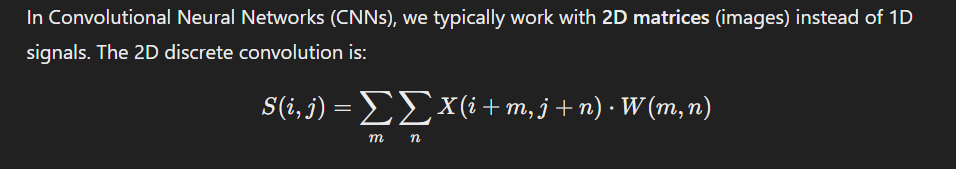

In [24]:
import numpy as np
# gray scale image 2d image HxW
image = np.array([
    [1, 2, 3, 0, 1],
    [4, 5, 6, 1, 2],
    [7, 8, 9, 2, 3],
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 0]])

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]]) # weights

output_shape = (image.shape[0]-kernel.shape[0]+1, image.shape[1]-kernel.shape[1]+1)
output = np.zeros(output_shape)

In [25]:
# 3x3 region
image[0:3,0:3]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [32]:
regions = []
# computation based on the output shape; 
for i in range(output_shape[0]):
    for j in range(output_shape[1]):
        region = image[i:i+3,j:j+3]
        regions.append(region)
        output[i,j] = np.sum(kernel *region)

In [31]:
output

array([[-6., 12., 12.],
       [-6.,  8.,  8.],
       [-6.,  2., 12.]])

In [ ]:
# stride
